# Step 1: Installation and Setup

In [2]:
# Installing TensorFlow
! pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle to Colab

In [5]:
# Installing Kaggle API
! pip install -q kaggle


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Create a directory named .kaggle in the specified location
!mkdir "C:\Users\jibin\.kaggle" # change the path if required


#### run below command in powershell
#### Set the Kaggle API key path
$env:KAGGLE_CONFIG_DIR = "$env:USERPROFILE\.kaggle"
#### Download the dataset : change the data path accordingly
kaggle datasets download -d tongpython/cat-and-dog -p "C:\Users\jibin\OneDrive\Documents\MS Germany\Job\Learnings\DL4_newbies\Data" 


In [13]:
import shutil
shutil.unpack_archive(r'C:\Users\jibin\OneDrive\Documents\MS Germany\Job\Learnings\DL4_newbies\Data\cat-and-dog.zip', r'C:\Users\jibin\OneDrive\Documents\MS Germany\Job\Learnings\DL4_newbies\Data', 'zip')


# Step 3: Building the Model

In [14]:
# Creating an object (Initilizing CNN)
model = tf.keras.models.Sequential()

Adding first CCN layer
1) filters (kernel/feature detectors) = 64  : number of convolutional filters that will be applied to the input data.Each filter is responsible for detecting different features in the input data.
2) kernal size = 3  :  dimensions of the convolutional filter.It means that each filter will have a 3x3 grid of weights
3) padding = same : technique used to preserve the spatial dimensions of the input volume. "Same" padding means that the input will be padded in such a way that the output spatial dimensions will be the same as the input spatial dimensions.
4) activation = ReLU : function applied to the output of each neuron (or node) in the layer.
5) input shape = (32, 32, 3) :expects input images of size (32, 32, 3).

In [15]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [17]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid   "Valid" padding means no padding is applied. The pooling window is only placed over positions where it fully fits within the input, and any partial pooling windows at the edges are ignored.

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [18]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [19]:
# Adding Flattening layer
model.add(tf.keras.layers.Flatten())

In [20]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [21]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
# Adding output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to images

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
training_data_dir = r"C:\Users\jibin\OneDrive\Documents\MS Germany\Job\Learnings\DL4_newbies\Data\training_set\training_set"
test_data_dir = r"C:\Users\jibin\OneDrive\Documents\MS Germany\Job\Learnings\DL4_newbies\Data\test_set\test_set"

In [27]:
# rescale images
datagen = ImageDataGenerator(rescale=1./255)

In [38]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],class_mode = 'binary', batch_size = 20)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [39]:
len(training_set), len(test_set)

(401, 102)

In [40]:
len(training_set) *20, len(test_set)*20

(8020, 2040)

In [41]:
test_set.batch_size

20

In [42]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

C:\Users\jibin\AppData\Local\Temp\ipykernel_1732\1888848155.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)


Epoch 1/20
401/401 [==============================] - 21s 48ms/step - loss: 0.6669 - accuracy: 0.5889 - val_loss: 0.6073 - val_accuracy: 0.6906
Epoch 2/20
401/401 [==============================] - 15s 38ms/step - loss: 0.5934 - accuracy: 0.6821 - val_loss: 0.5757 - val_accuracy: 0.7044
Epoch 3/20
401/401 [==============================] - 15s 38ms/step - loss: 0.5528 - accuracy: 0.7117 - val_loss: 0.5442 - val_accuracy: 0.7237
Epoch 4/20
401/401 [==============================] - 15s 38ms/step - loss: 0.5222 - accuracy: 0.7422 - val_loss: 0.5291 - val_accuracy: 0.7430
Epoch 5/20
401/401 [==============================] - 15s 38ms/step - loss: 0.4982 - accuracy: 0.7598 - val_loss: 0.5307 - val_accuracy: 0.7410
Epoch 6/20
401/401 [==============================] - 16s 40ms/step - loss: 0.4781 - accuracy: 0.7650 - val_loss: 0.5103 - val_accuracy: 0.7489
Epoch 7/20
401/401 [==============================] - 16s 39ms/step - loss: 0.4613 - accuracy: 0.7750 - val_loss: 0.5551 - val_accuracy:

# Step 5: Plotting the learning curve

In [43]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


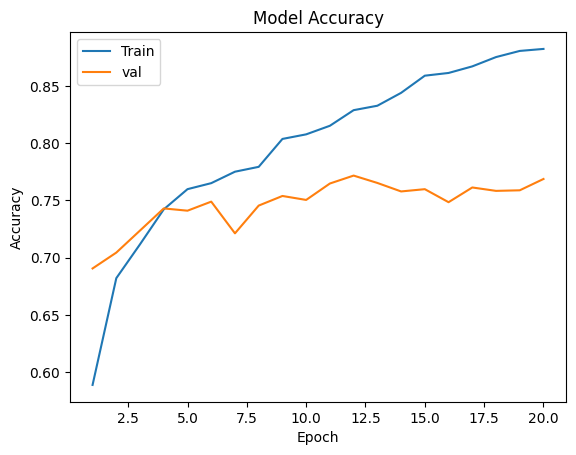

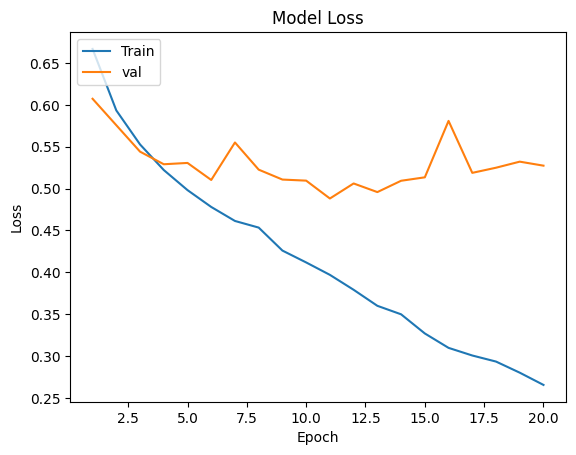

In [44]:
learning_curve(history, 20)